# Scope

Main goal of this project is to classify tea based on pictures. Pictures of tea were scraped from polish tea shop eherbata.pl. To achive this goal few different models  and approaches will be used - CNN feeded with phots, classic models based on histograms and PCA output and MLP based on histograms.

# Imports

In [15]:
import PIL
import matplotlib.pyplot as plt
import cv2
# from google.colab.patches import cv2_imshow
import pandas as pd
import requests
import re
from time import sleep
import html
import unicodedata
from bs4 import BeautifulSoup
import random
import urllib
import numpy as np

In [16]:
link_black = 'https://eherbata.pl/herbaty-30/czarna-herbata-5/'
link_green = 'https://eherbata.pl/herbaty-30/zielona-herbata-3/'

# Declaring functions

In [17]:
def _get_website(link):
  http_adress = link
  response = requests.get(http_adress)
  content = response.content.decode('utf-8')
  content = html.unescape(content)
  content = unicodedata.normalize('NFKD', content)
  soup = BeautifulSoup(content, 'html.parser')
  return soup

In [18]:
def get_product_links(link):
  tea_links = []
  soup = _get_website(link)
  links = soup.find_all('div', {'class' : 'product-image'})
  for i in range(len(links)):
    tea_links.append(links[i].find('a',
                                   {'class' : "product-image-hover"},
                                   href = True)['href'])
  return tea_links

In [19]:
def get_image_link(link):
  soup = _get_website(link)
  image_link = soup.find('img', {'itemprop' : 'image'})['src']
  image_link = 'https://eherbata.pl' + image_link
  return image_link


In [20]:
def url_to_image(link):
	resp = urllib.request.urlopen(link)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

In [21]:
def resize_crop_image(image, ratio = 0.3):
  image = image[:,100:550]
  width = int(image.shape[1] * ratio)
  height = int(image.shape[0] * ratio)
  resized = cv2.resize(image, (width, height))
  return resized

# Testing functions

In [22]:
x = url_to_image('https://eherbata.pl/upload/products/94/details/eherbata-pl-yunnan-zloty-1.jpg')

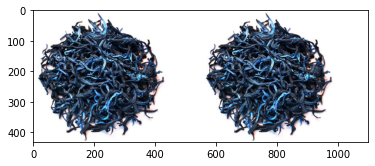

In [23]:
plt.imshow(np.hstack((x[:,100:550], x)))

In [24]:
resized = resize_crop_image(x)

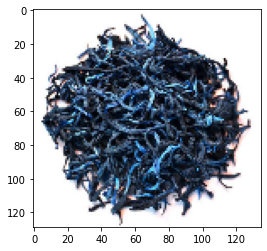

In [25]:
plt.imshow(resized)

# Obtaining products links

## Black tea

In [26]:
black_tea_links = get_product_links(link_black)

In [27]:
black_tea_links

['https://eherbata.pl/kenia-imenti-tippy-2023-2536.html',
 'https://eherbata.pl/kenia-mountain-black-2023-1804.html',
 'https://eherbata.pl/yunnan-laoshu-hongcha-2022-2386.html',
 'https://eherbata.pl/doke-black-fusion-2022-2473.html',
 'https://eherbata.pl/shan-cha-2022-2282.html',
 'https://eherbata.pl/keemun-hao-ya-1074.html',
 'https://eherbata.pl/herbata-krakowska-1820.html',
 'https://eherbata.pl/taiwan-breakfast-2216.html',
 'https://eherbata.pl/taiwan-wuyi-hongcha-2021-1776.html',
 'https://eherbata.pl/darjeeling-jungpana-wonder-muscatel-2022-2099.html',
 'https://eherbata.pl/darjeeling-rohini-yabukita-2022-2522.html',
 'https://eherbata.pl/yunnan-golden-silk-2006.html',
 'https://eherbata.pl/fuding-jin-guan-yin-hongcha-2022-2517.html',
 'https://eherbata.pl/dong-ding-hongcha-2022-2516.html',
 'https://eherbata.pl/gruzinska-gezruli-2022-2515.html',
 'https://eherbata.pl/meizhan-hongcha-2022-2034.html',
 'https://eherbata.pl/golden-monkey-148.html',
 'https://eherbata.pl/keemun-

## Green tea

In [28]:
green_tea_links = get_product_links(link_green)
green_tea_links

['https://eherbata.pl/jiangshan-mao-feng-2022-2384.html',
 'https://eherbata.pl/long-jing-7.html',
 'https://eherbata.pl/yunnan-zao-chun-2023-1786.html',
 'https://eherbata.pl/sencha-isagawa-organic-2022-2199.html',
 'https://eherbata.pl/ding-gu-da-fang-2.html',
 'https://eherbata.pl/bancha-kyoto-2022-1089.html',
 'https://eherbata.pl/gyokuro-miyazaki-bio--1420.html',
 'https://eherbata.pl/matcha-hisui-organic-1981.html',
 'https://eherbata.pl/zestaw-herbat-klubowych-1851.html',
 'https://eherbata.pl/guizhou-lubaoshi-2083.html',
 'https://eherbata.pl/long-jing-supergrade-2022-285.html',
 'https://eherbata.pl/kabusecha-okumidori-organic-2022-2366.html',
 'https://eherbata.pl/matcha-shizuoka-40g-1608.html',
 'https://eherbata.pl/sanxia-bi-luo-chun-2022-1754.html',
 'https://eherbata.pl/putuo-focha-2022-2519.html',
 'https://eherbata.pl/sencha-ichoka-organic-2022-2377.html',
 'https://eherbata.pl/tamaryokucha-ureshino-2022-739.html',
 'https://eherbata.pl/anji-bai-cha-287.html',
 'https:/

## Getting rid of troublesome products

### Black tea

In [29]:
problematic = ['zestaw', 'yiwu']

In [30]:
to_delete = []
for link in black_tea_links:
  for pattern in problematic:
    if pattern in link:
      to_delete.append(link)

In [31]:
black_tea_links = [x for x in black_tea_links if x not in to_delete]

In [32]:
black_tea_links

['https://eherbata.pl/kenia-imenti-tippy-2023-2536.html',
 'https://eherbata.pl/kenia-mountain-black-2023-1804.html',
 'https://eherbata.pl/yunnan-laoshu-hongcha-2022-2386.html',
 'https://eherbata.pl/doke-black-fusion-2022-2473.html',
 'https://eherbata.pl/shan-cha-2022-2282.html',
 'https://eherbata.pl/keemun-hao-ya-1074.html',
 'https://eherbata.pl/herbata-krakowska-1820.html',
 'https://eherbata.pl/taiwan-breakfast-2216.html',
 'https://eherbata.pl/taiwan-wuyi-hongcha-2021-1776.html',
 'https://eherbata.pl/darjeeling-jungpana-wonder-muscatel-2022-2099.html',
 'https://eherbata.pl/darjeeling-rohini-yabukita-2022-2522.html',
 'https://eherbata.pl/yunnan-golden-silk-2006.html',
 'https://eherbata.pl/fuding-jin-guan-yin-hongcha-2022-2517.html',
 'https://eherbata.pl/dong-ding-hongcha-2022-2516.html',
 'https://eherbata.pl/gruzinska-gezruli-2022-2515.html',
 'https://eherbata.pl/meizhan-hongcha-2022-2034.html',
 'https://eherbata.pl/golden-monkey-148.html',
 'https://eherbata.pl/keemun-

### Green tea

In [33]:
problematic = ['genmaicha', 'matcha', 'zestaw', 'extra']


In [34]:
to_delete = []
for link in green_tea_links:
  for pattern in problematic:
    if pattern in link:
      to_delete.append(link)

In [35]:
green_tea_links = [x for x in green_tea_links if x not in to_delete]

In [36]:
green_tea_links

['https://eherbata.pl/jiangshan-mao-feng-2022-2384.html',
 'https://eherbata.pl/long-jing-7.html',
 'https://eherbata.pl/yunnan-zao-chun-2023-1786.html',
 'https://eherbata.pl/sencha-isagawa-organic-2022-2199.html',
 'https://eherbata.pl/ding-gu-da-fang-2.html',
 'https://eherbata.pl/bancha-kyoto-2022-1089.html',
 'https://eherbata.pl/gyokuro-miyazaki-bio--1420.html',
 'https://eherbata.pl/guizhou-lubaoshi-2083.html',
 'https://eherbata.pl/long-jing-supergrade-2022-285.html',
 'https://eherbata.pl/kabusecha-okumidori-organic-2022-2366.html',
 'https://eherbata.pl/sanxia-bi-luo-chun-2022-1754.html',
 'https://eherbata.pl/putuo-focha-2022-2519.html',
 'https://eherbata.pl/sencha-ichoka-organic-2022-2377.html',
 'https://eherbata.pl/tamaryokucha-ureshino-2022-739.html',
 'https://eherbata.pl/anji-bai-cha-287.html',
 'https://eherbata.pl/sencha-5.html',
 'https://eherbata.pl/sencha-yabukita-organic-2022-1823.html',
 'https://eherbata.pl/sencha-saemidori-organic-2022-1824.html',
 'https://e

# Scraping pictures

## Black tea

In [37]:
black_tea_images = []
for link in black_tea_links:
  image_url = get_image_link(link)
  image_array = url_to_image(image_url)
  transformed = resize_crop_image(image_array)
  black_tea_images.append(transformed)

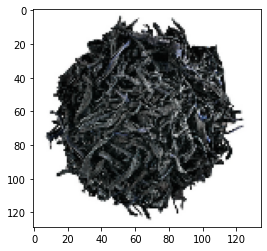

In [38]:
plt.imshow(black_tea_images[19])

## Green tea

In [39]:
green_tea_images = []
for link in green_tea_links:
  image_url = get_image_link(link)
  image_array = url_to_image(image_url)
  transformed = resize_crop_image(image_array)
  green_tea_images.append(transformed)

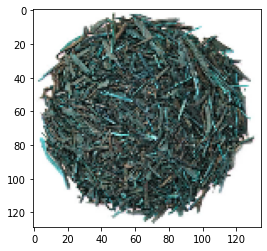

In [40]:
plt.imshow(green_tea_images[9])

In [41]:
green_tea_images[13].shape

(129, 135, 3)

# Classic models

## Feature extraction

In [42]:
print(f"number of black tea pictures: {len(black_tea_images)}")
print(f"number of green tea pictures: {len(green_tea_images)}")

number of black tea pictures: 93
number of green tea pictures: 70


In [53]:
black_target = ['black'] * len(black_tea_images)
green_target = ['green'] * len(green_tea_images)
target = black_target + green_target

In [54]:
input_data = black_tea_images + green_tea_images

### Picture conversion to histograms

Since there is no visible difference between green and black tea (in terms of shape/fraction of the leaves) instead of feeding pictures into algorithm, i will use histograms for RGB channels. For all pictures histograms will be created and then data will be used to feed logistic regression and SVM models.

In [55]:
import itertools

In [56]:
list_of_data = []
for image in input_data:

  colors = ("red", "green", "blue")
  image_variables = []
  for channel_id, color in enumerate(colors):
      histogram, bin_edges = np.histogram(
          image[:, :, channel_id], bins=(range(0,260,15)))
      image_variables.append(histogram.tolist())
      flatten_list = list(itertools.chain(*image_variables))
  list_of_data.append(flatten_list)

In [57]:
df_histograms = pd.DataFrame(list_of_data)

In [58]:
len(target)

163

In [59]:
df_histograms['target'] = target

In [60]:
df_histograms

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,target
0,2166,1620,1438,1323,1140,1007,803,513,359,227,...,384,309,257,205,143,94,61,85,6213,black
1,1888,1519,1585,1662,1698,1427,928,451,207,92,...,928,554,298,176,125,100,115,128,5492,black
2,2909,2375,1775,1231,812,548,331,194,141,125,...,336,307,249,268,243,244,220,316,5706,black
3,3323,1652,1391,1146,854,602,346,197,121,95,...,151,88,79,76,71,57,71,111,7212,black
4,3160,1876,1586,1101,719,395,241,167,120,108,...,164,129,116,133,137,162,181,233,6883,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1080,1467,1523,1439,1261,992,796,642,458,329,...,786,724,593,533,433,287,211,231,6918,green
159,1571,2686,1842,1263,804,550,495,339,305,222,...,896,1027,1086,911,725,522,296,279,6486,green
160,690,767,894,980,1180,1290,1351,1283,1092,818,...,1362,1306,1167,956,620,489,286,203,5416,green
161,1194,1655,1961,1882,1582,1106,599,367,179,122,...,902,592,386,226,154,105,69,93,6506,green


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [62]:
X = df_histograms.drop(columns = ['target'])
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)


In [63]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

There are 162 rows and 52 columns. To reduce dimensions, PCA will be used.

### PCA

In [64]:
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_std)
exp_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(exp_var)


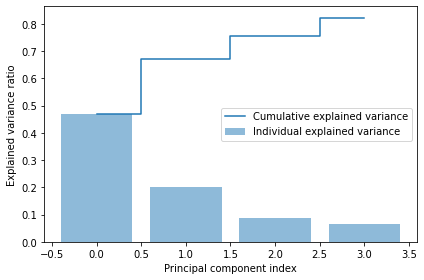

In [65]:
plt.bar(range(0,len(exp_var)), exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumsum_var)), cumsum_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [66]:
print(f"PCA % of explained variance for 4 components: {cumsum_var[3]}")

PCA % of explained variance for 4 components: 0.8230016518377468


In [67]:
X_test_pca = pca.transform(X_test_std)

Comparision of performance for models with original data vs PCA data.

## binary classification using 4 principal components - log reg & svm

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [69]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)
print(f"test score: {log_reg.score(X_test_pca, y_test)}")
print(f"train score: {log_reg.score(X_train_pca, y_train)}")
print('-----------------------')
y_pred = log_reg.predict(X_test_pca)
print(classification_report(y_pred, y_test))
print('-----------------------')
print(confusion_matrix(y_pred, y_test))

test score: 0.6666666666666666
train score: 0.7461538461538462
-----------------------
              precision    recall  f1-score   support

       black       0.63      0.75      0.69        16
       green       0.71      0.59      0.65        17

    accuracy                           0.67        33
   macro avg       0.67      0.67      0.67        33
weighted avg       0.67      0.67      0.66        33

-----------------------
[[12  4]
 [ 7 10]]


In [70]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_pca, y_train)
print(f"test score: {svm.score(X_test_pca, y_test)}")
print(f"train score: {svm.score(X_train_pca, y_train)}")
print('-----------------------')

y_pred = svm.predict(X_test_pca)
print(classification_report(y_pred, y_test))
print('-----------------------')
print(confusion_matrix(y_pred, y_test))

test score: 0.6363636363636364
train score: 0.7538461538461538
-----------------------
              precision    recall  f1-score   support

       black       0.68      0.68      0.68        19
       green       0.57      0.57      0.57        14

    accuracy                           0.64        33
   macro avg       0.63      0.63      0.63        33
weighted avg       0.64      0.64      0.64        33

-----------------------
[[13  6]
 [ 6  8]]


## binary classification using original data - log reg & svm

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
print(f"test score: {log_reg.score(X_test_std, y_test)}")
print(f"train score: {log_reg.score(X_train_std, y_train)}")
print('-----------------------')
y_pred = log_reg.predict(X_test)
print(classification_report(y_pred, y_test))
print('-----------------------')
print(confusion_matrix(y_pred, y_test))

test score: 0.7272727272727273
train score: 0.9384615384615385
-----------------------
              precision    recall  f1-score   support

       black       0.63      0.86      0.73        14
       green       0.86      0.63      0.73        19

    accuracy                           0.73        33
   macro avg       0.74      0.74      0.73        33
weighted avg       0.76      0.73      0.73        33

-----------------------
[[12  2]
 [ 7 12]]


In [72]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_std, y_train)
print(f"test score: {svm.score(X_test_std, y_test)}")
print(f"train score: {svm.score(X_train_std, y_train)}")
print('-----------------------')
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))
print('-----------------------')
print(confusion_matrix(y_pred, y_test))

test score: 0.6666666666666666
train score: 0.8615384615384616
-----------------------
              precision    recall  f1-score   support

       black       1.00      0.58      0.73        33
       green       0.00      0.00      0.00         0

    accuracy                           0.58        33
   macro avg       0.50      0.29      0.37        33
weighted avg       1.00      0.58      0.73        33

-----------------------
[[19 14]
 [ 0  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In all cases model is overfitted. In case of logistic regression regularization can be used. **TO ADD**

# CNN

In this section CNN will be created and trained on original downsized pictures.

In [73]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, RandomRotation, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical

## Data preparation

In [74]:
ratio = 0.4
resized_input = []
for element in input_data:
  width = int(image.shape[1] * ratio)
  height = int(image.shape[0] * ratio)
  resized = cv2.resize(element, (width, height))
  resized_input.append(resized)

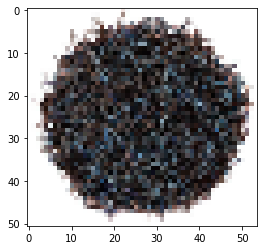

In [75]:
plt.imshow(resized_input[0])

In [76]:
resized_input[0].shape

(51, 54, 3)

In [77]:
x_tf_input = np.array(resized_input)/255

In [78]:
target_np = np.array(target)
target_binary = np.where(target_np == 'green', 1, 0)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_tf_input, target_binary, stratify = target_binary)

In [80]:
X_test.shape

(41, 51, 54, 3)

## Declaring network

In [81]:
model = Sequential()

model.add(RandomRotation(factor = 0.3))

model.add(Conv2D(64, (1, 1),
          activation='relu',
          input_shape=(51, 54, 3),
          kernel_initializer='he_uniform',
          padding='same'))

model.add(Conv2D(32, (3, 3),
          activation='relu',
          kernel_initializer='he_uniform',
          padding='same'))

model.add(Conv2D(16, (1, 1),
          activation='relu',
          kernel_initializer='he_uniform',
          padding='same'))

model.add(Flatten())
model.add(Dense(32,
          activation='relu'))
model.add(Dense(1,
          activation='sigmoid'))

In [82]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [83]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    validation_data=(X_test, y_test),
                    verbose = 1)

Epoch 1/50


4/4 [==============================] - 15s 220ms/step - loss: 7.4639 - accuracy: 0.4754 - val_loss: 1.6353 - val_accuracy: 0.4390
Epoch 2/50
4/4 [==============================] - 0s 66ms/step - loss: 1.2002 - accuracy: 0.4426 - val_loss: 0.8378 - val_accuracy: 0.5610
Epoch 3/50
4/4 [==============================] - 0s 71ms/step - loss: 0.7121 - accuracy: 0.5902 - val_loss: 0.7487 - val_accuracy: 0.4390
Epoch 4/50
4/4 [==============================] - 0s 71ms/step - loss: 0.7161 - accuracy: 0.4590 - val_loss: 0.6457 - val_accuracy: 0.5610
Epoch 5/50
4/4 [==============================] - 0s 76ms/step - loss: 0.6562 - accuracy: 0.6230 - val_loss: 0.6817 - val_accuracy: 0.4634
Epoch 6/50
4/4 [==============================] - 0s 67ms/step - loss: 0.6539 - accuracy: 0.5246 - val_loss: 0.6128 - val_accuracy: 0.5854
Epoch 7/50
4/4 [==============================] - 0s 77ms/step - loss: 0.5799 - accuracy: 0.6639 - val_loss: 0.5620 - val_accuracy: 0.7073
Epoch 8/50
4/4 [====================

In [84]:
def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)

## Training process

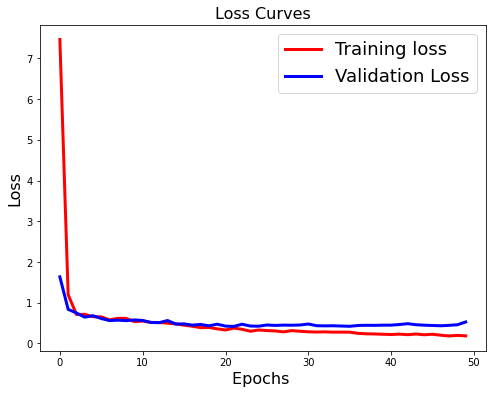

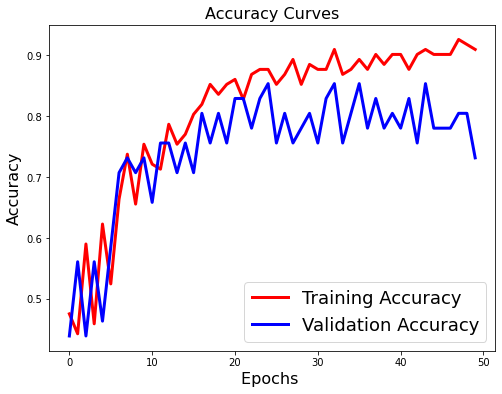

In [85]:
plot_history(history)

Process of model training is not stable, but taking into consideration that there are only 162 pictures, the performance is not bad.


## Output

In [86]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [87]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [88]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [89]:
print(classification_report(y_pred, y_test))
print("----------------")
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.56      0.77      0.65        13

    accuracy                           0.73        41
   macro avg       0.71      0.74      0.71        41
weighted avg       0.77      0.73      0.74        41

----------------
[[20  8]
 [ 3 10]]


# MLP

In this section all previous model will be challanged by fully-connected neural network trained on histogram data.

## Data preparation

In [90]:
X = df_histograms.drop(columns = ['target'])
X = np.array(X)
y = target
target_np = np.array(target)
target_binary = np.where(target_np == 'green', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, target_binary, test_size=0.2, stratify = target_binary)


In [91]:
X_test.shape

(33, 51)

## Declaring network

In [92]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128,
                             activation = 'relu',
                             input_shape = (None,51)))

model.add(keras.layers.Dense(64,
                             activation = 'relu'))

model.add(keras.layers.Dense(64,
                             activation = 'relu'))
model.add(keras.layers.Dense(1,
                             activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Training process

In [93]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    validation_data=(X_test, y_test),
                    batch_size = 16,
                    verbose = 1)

Epoch 1/50


1/9 [==>...........................] - ETA: 12s - loss: 63.0567 - accuracy: 0.6250

9/9 [==============================] - 2s 34ms/step - loss: 57.7876 - accuracy: 0.6769 - val_loss: 52.1325 - val_accuracy: 0.6364
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 36.7232 - accuracy: 0.5692 - val_loss: 70.5012 - val_accuracy: 0.5758
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 39.0756 - accuracy: 0.6231 - val_loss: 51.2112 - val_accuracy: 0.6364
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 31.3711 - accuracy: 0.6923 - val_loss: 13.6381 - val_accuracy: 0.7273
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 9.9788 - accuracy: 0.7385 - val_loss: 3.7922 - val_accuracy: 0.7273
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 6.6124 - accuracy: 0.7462 - val_loss: 12.8244 - val_accuracy: 0.7273
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 9.7642 - accuracy: 0.7231 - val_loss: 20.4773 - val_accuracy: 0.7273
Epoch 8/50
9/9 [=================

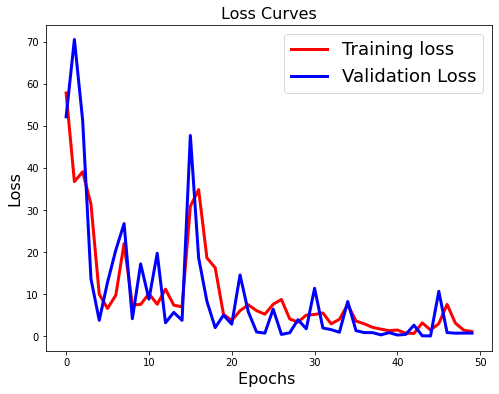

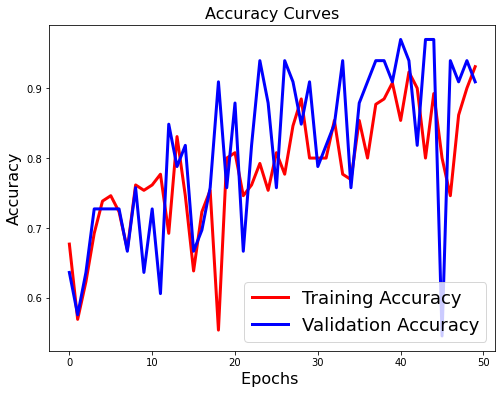

In [94]:
plot_history(history)

## Output

In [95]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [96]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [97]:
print(classification_report(y_pred, y_test))
print("----------------")
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.79      1.00      0.88        11

    accuracy                           0.91        33
   macro avg       0.89      0.93      0.90        33
weighted avg       0.93      0.91      0.91        33

----------------
[[19  3]
 [ 0 11]]


# Writting dataset to file

In [98]:
df_histograms.to_csv('histograms_data.csv')

In [99]:
import pickle

# write list to binary file
def write_list(a_list):
    # store list in binary file so 'wb' mode
    with open('listfile', 'wb') as fp:
        pickle.dump(input_data, fp)

In [100]:
def read_list():
    # for reading also binary mode is important
    with open('sampleList', 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

In [101]:
write_list(input_data)